In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy
import lightkurve as lk
from scipy import *
from astropy import constants as ac
from astropy import units as u

In [2]:
from matplotlib import rcParams
rcParams["savefig.dpi"] = 100
rcParams["figure.dpi"] = 100
rcParams["font.size"] = 18
rcParams["figure.figsize"] = [8, 5]
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Computer Modern Sans Serif"]
rcParams["text.usetex"] = True
plt.rcParams['axes.linewidth']=1.5

In [117]:
candidates = pd.read_csv('/Users/lupitatovar/Cool-Worlds/targets/cadidates_tsm.csv')
confirmed = pd.read_csv('/Users/lupitatovar/Cool-Worlds/targets/confirmed_tsm.csv')
stars = pd.read_csv('/Users/lupitatovar/Cool-Worlds/targets/stellar_propoerties.csv')

In [4]:
len(stars['type'].values)

41

### Spectral Type of all of the targets

In [5]:
stars['type'].values

array(['K4V', 'M2V', 'G5V', 'M2V', 'K7V', 'M0V', 'M1V', 'K6V', 'G8V',
       'G8V', 'G8V', 'F7V', 'K0V', 'K2V', 'K3V', 'K3V', 'G7V', 'G8V',
       'G5V', 'K5V', 'K0V', 'F9V', 'K6V', 'K0V', 'K0V', 'G5V', 'G0V',
       'K4V', 'K3V', 'K3V', 'K3V', 'K2V', 'F8V', 'K3V', 'G8V', 'K4V',
       'G9V', 'M8.9V', 'M8.9V', 'M4V', 'K3V'], dtype=object)

In [97]:
cand = stars[stars['Status'].str.contains('Candidate')]
conf = stars[stars['Status'].str.contains('Confirmed')]

In [6]:
F = stars[stars['type'].str.contains('F')]
G = stars[stars['type'].str.contains('G')]
K = stars[stars['type'].str.contains('K')]
M = stars[stars['type'].str.contains('M')]
print(F)

       hostname  st_mass  st_radius  st_teff  st_log_lum  st_distance type  \
11  KIC 6067545    1.045      1.040   6202.0    0.160000   519.100000  F7V   
21  KIC 8352009    1.221      1.276   6065.7    0.299000  1019.500000  F9V   
32  KIC 3548622    1.025      0.947   6117.0    0.053549  2158.144469  F8V   

      Jmag    Kmag  activity_index     Status Discovery  
11  12.022  11.723             NaN  Candidate    Kepler  
21  13.112  12.752             NaN  Candidate    Kepler  
32  13.454  12.964             NaN  Candidate    Kepler  


In [7]:
spectral_types = [F['type'].values,G['type'].values,K['type'].values,M['type'].values]
print(spectral_types)

[array(['F7V', 'F9V', 'F8V'], dtype=object), array(['G5V', 'G8V', 'G8V', 'G8V', 'G7V', 'G8V', 'G5V', 'G5V', 'G0V',
       'G8V', 'G9V'], dtype=object), array(['K4V', 'K7V', 'K6V', 'K0V', 'K2V', 'K3V', 'K3V', 'K5V', 'K0V',
       'K6V', 'K0V', 'K0V', 'K4V', 'K3V', 'K3V', 'K3V', 'K2V', 'K3V',
       'K4V', 'K3V'], dtype=object), array(['M2V', 'M2V', 'M0V', 'M1V', 'M8.9V', 'M8.9V', 'M4V'], dtype=object)]


In [8]:
np.sort(spectral_types[1])

array(['G0V', 'G5V', 'G5V', 'G5V', 'G7V', 'G8V', 'G8V', 'G8V', 'G8V',
       'G8V', 'G9V'], dtype=object)

In [9]:
len(M)

7

Text(0.5, 0, 'Spectral Type')

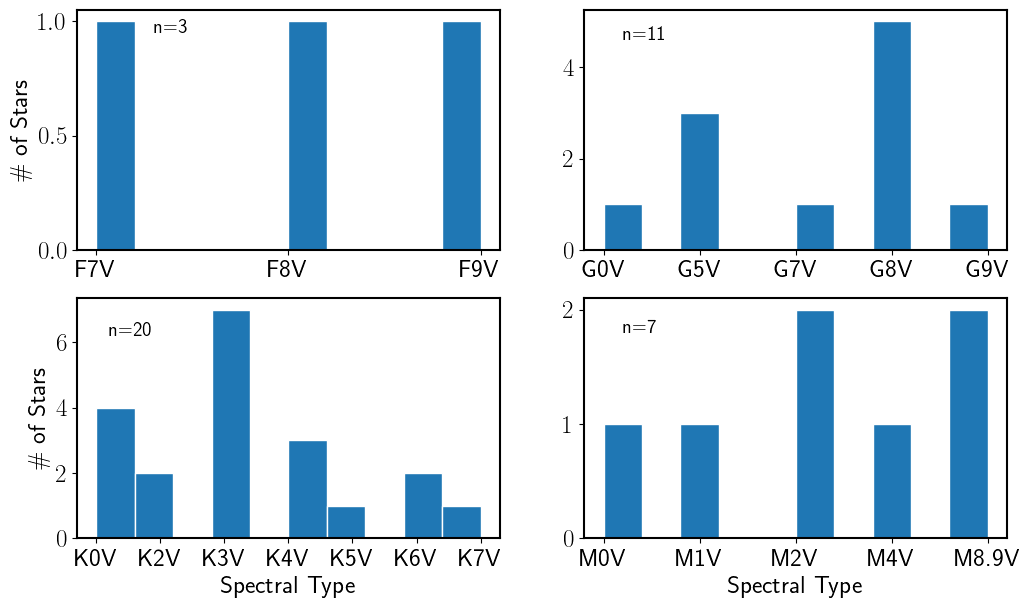

In [10]:
fig, axs = plt.subplots(2,2, figsize=(12,7), facecolor='w', edgecolor='k')

axs[0,0].hist(np.sort(spectral_types[0]),edgecolor='white')
axs[0,0].text(.3,.95,'n=3',fontsize=14)
#axs[0,0].set_xlabel('Spectral Type')
axs[0,0].set_ylabel('\# of Stars')

axs[0,1].hist(np.sort(spectral_types[1]),edgecolor='white')
axs[0,1].text(.2,4.6,'n=11',fontsize=14)
#plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
#axs[0,1].set_xlabel('Spectral Type')
#axs[0,1].set_ylabel('\# of Stars')

axs[1,0].hist(np.sort(spectral_types[2]),edgecolor='white')
axs[1,0].text(.2,6.2,'n=20',fontsize=14)
axs[1,0].set_xlabel('Spectral Type')
axs[1,0].set_ylabel('\# of Stars')

axs[1,1].hist(np.sort(spectral_types[3]),edgecolor='white')
axs[1,1].text(.2,1.8,'n=7',fontsize=14)
axs[1,1].set_xlabel('Spectral Type')
#axs[1,1].set_ylabel('\# of Stars')

### Plotting the J and K magnitude of the targets

Text(0.5, 1.0, 'n=41')

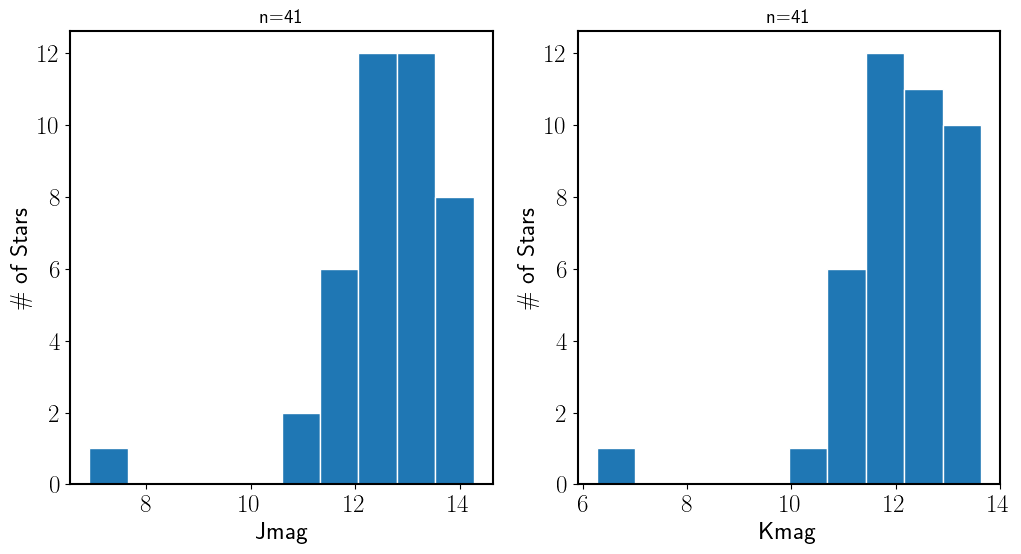

In [11]:
fig, axs = plt.subplots(1,2, figsize=(12,6), facecolor='w', edgecolor='k')

axs[0].hist(stars['Jmag'].values,edgecolor='white')
axs[0].set_xlabel('Jmag')
axs[0].set_ylabel('\# of Stars')
axs[0].set_title('n=41',fontsize=14)

axs[1].hist(stars['Kmag'].values,edgecolor='white')
axs[1].set_xlabel('Kmag')
axs[1].set_ylabel('\# of Stars')
axs[1].set_title('n=41',fontsize=14)

### Plotting the luminosity versus distance of the targets

In [12]:
10**stars['st_log_lum'].values

array([2.25423921e-01, 2.69773943e-02, 2.66072506e-01, 2.30144182e-02,
       7.55092228e-02, 6.28058359e-02, 6.38263486e-02, 1.30918192e-01,
       5.78096047e-01, 6.91830971e-01, 5.61047976e-01, 1.44543977e+00,
       3.79591868e-01, 3.79314985e-01, 2.85101827e-01, 2.81190083e-01,
       6.44169266e-01, 6.36795521e-01, 4.08319386e-01, 1.48251809e-01,
       4.40554864e-01, 1.99067334e+00, 1.30316678e-01, 5.03500609e-01,
       4.13047502e-01, 7.12853030e-01, 1.18850223e+00, 1.16775870e-01,
       4.02938106e-01, 1.35207256e-01, 3.34195040e-01, 3.82824743e-01,
       1.13122395e+00, 2.03235701e-01, 3.96278034e-01, 2.48885732e-01,
       7.97994687e-01, 1.43852034e-03, 1.43852034e-03, 4.90923366e-03,
       2.42482000e-01])

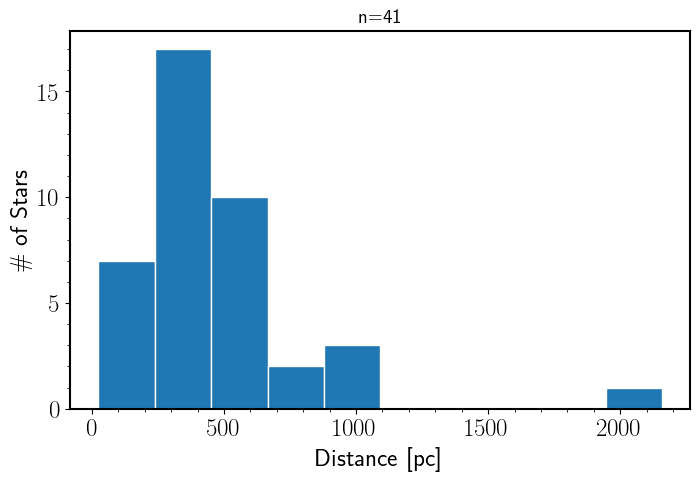

In [13]:
plt.hist(stars['st_distance'].values,edgecolor='white')
plt.xlabel('Distance [pc]')
plt.ylabel('\# of Stars')
plt.title('n=41',fontsize=14)
plt.minorticks_on()
#plt.xlim(0,100)

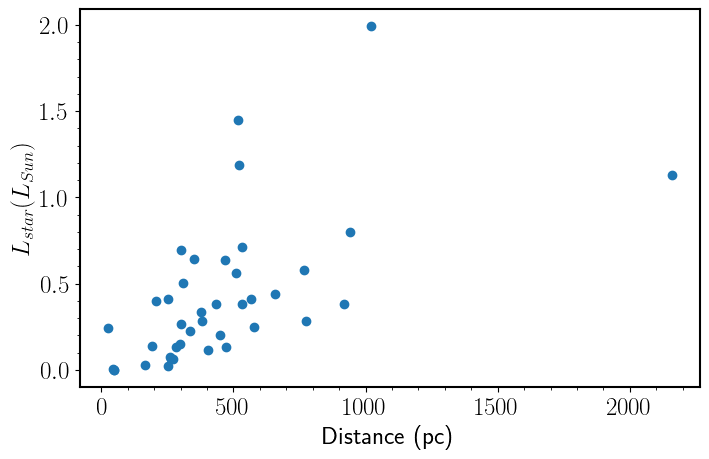

In [14]:
plt.scatter(stars['st_distance'].values,10**stars['st_log_lum'].values)
#plt.axhline(y=0.1, color='k', linestyle='-')
#plt.axhline(y=.8, color='k', linestyle='-')
#plt.axhline(y=1.5, color='k', linestyle='-')

plt.xlabel('Distance (pc)')
plt.ylabel('$L_{star} (L_{Sun})$')
plt.minorticks_on()

#plt.xlim(0,50)

LUVOIR limit might be 25pc

In [15]:
min(stars['st_distance'].values)

25.0039

(0.0, 30.0)

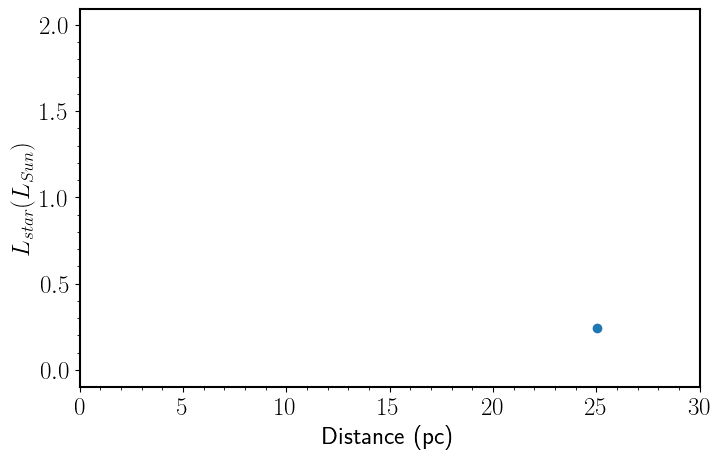

In [16]:
plt.scatter(stars['st_distance'].values,10**stars['st_log_lum'].values)
#plt.axhline(y=0.1, color='k', linestyle='-')
#plt.axhline(y=.8, color='k', linestyle='-')
#plt.axhline(y=1.5, color='k', linestyle='-')

plt.xlabel('Distance (pc)')
plt.ylabel('$L_{star} (L_{Sun})$')
plt.minorticks_on()

plt.xlim(0,30)

### Calculating Contrast

Based on Brown 2005 paper equation 3 (https://iopscience.iop.org/article/10.1086/429124/pdf)

$\Delta$mag = -2.5log$\frac{F_p}{F_s}$ =  -2.5log[p$\Phi(\beta)(\frac{R}{r})^2$]

where r = distance between planet and the star

$\beta$ = phase angle (can assume quadrature so 90 degrees)

$\Phi(\beta)$ = planetary phase function (lambertian)

R = radius of planet

p = geometric albedo of planet (.33 for Earth-like) and


$\Phi_L(\beta)$ = $\frac{\sin\beta + (\pi-\beta) cos\beta}{\pi}$

In [17]:
def lambertian (b):
    psi = ((np.sin(b)) + (np.pi-b) * np.cos(b)) /(np.pi)
    return psi

In [37]:
lambertian(np.pi/2) #make sure I am in radians

0.3183098861837907

In [145]:
def contrast(p,l,Rp,r):
    dmag = 2.5 * (p*l*(Rp/r)**2)
    return dmag

In [ ]:
#need to convert Rp to au so units cancel out

In [20]:
candidates['semi_au'].values[0]

0.447411607

In [73]:
contrast(.33,.3,1.2,.4)

0.1253057399078134

In [26]:
len(confirmed)

6

### Contrast for confirmed planets

In [81]:
confirmed['semi_au'].values

array([0.53946715, 0.255     , 0.72274932, 0.1654    , 0.55880725,
       0.31574028])

In [82]:
confirmed['rade'].values

array([1.72227027, 1.8       , 1.533375  , 1.6       , 1.56843636,
       1.55647059])

In [83]:
u.earthRad.to(u.au)

4.263496512454037e-05

In [ ]:
confirmed['rade'].values * 4.26

In [146]:
contrast(.33,.3,11480,8e+07)

5.0965818749999996e-09

In [79]:
rad_conf.to(u.km).value[1]

11480.580000000002

In [78]:
rad_conf.to(u.km).value[1] / 8.07042850e+07

0.00014225490009607298

Converting units so that Rp/r cancel out unit wise. radii need to be in au not earth radii units

In [62]:
rad_conf = confirmed['rade'].values*u.earthRad 
rad_conf_au = rad_conf.to(u.au)#* 4.26352e-5
print(rad_conf)
print(rad_conf_au.value)

rad_cand = candidates['Radius'].values*u.earthRad 
rad_cand_au = rad_cand.to(u.au)#* 4.26352e-5
print(rad_cand)
print(rad_cand_au.value)

[1.72227027 1.8        1.533375   1.6        1.56843636 1.55647059] earthRad
[7.34289329e-05 7.67429372e-05 6.53753896e-05 6.82159442e-05
 6.68702297e-05 6.63600692e-05]
[1.79767347 1.88       1.50348189 1.14191118 1.61194444 1.92143498
 1.9        1.71082138 1.53286465 1.96313571 1.60854871 1.39590562
 1.48945889 1.89486486 1.50323604 1.99258972 1.35244068 1.58114376
 1.57898734 1.39853755 1.71755175 1.08       1.78       0.88623327
 1.48540342 1.575      1.96       1.2747006  0.91084005 1.86279597
 1.62852145 1.233      0.505      1.59466426 1.8602949 ] earthRad
[7.66437457e-05 8.01537344e-05 6.41008981e-05 4.86853434e-05
 6.87251952e-05 8.19203133e-05 8.10064337e-05 7.29408100e-05
 6.53536310e-05 8.36982223e-05 6.85804181e-05 5.95143875e-05
 6.35030278e-05 8.07874974e-05 6.40904162e-05 8.49539932e-05
 5.76612611e-05 6.74120089e-05 6.73200703e-05 5.96265996e-05
 7.32277592e-05 4.60457623e-05 7.58902379e-05 3.77845246e-05
 6.33301231e-05 6.71500701e-05 8.35645316e-05 5.43468156e-05
 3

In [64]:
2e-5/0.5

4e-05

In [147]:
dmag_conf = []

for i in range (0,len(confirmed)):
    dmag1 = contrast(.33,.3,rad_conf_au.value[i],confirmed['semi_au'].values[i])
    dmag_conf = np.append(dmag_conf,dmag1)
    print (dmag_conf)

[4.58542543e-09]
[4.58542543e-09 2.24166998e-08]
[4.58542543e-09 2.24166998e-08 2.02501574e-09]
[4.58542543e-09 2.24166998e-08 2.02501574e-09 4.20994074e-08]
[4.58542543e-09 2.24166998e-08 2.02501574e-09 4.20994074e-08
 3.54418811e-09]
[4.58542543e-09 2.24166998e-08 2.02501574e-09 4.20994074e-08
 3.54418811e-09 1.09327367e-08]


In [148]:
dmag_conf

array([4.58542543e-09, 2.24166998e-08, 2.02501574e-09, 4.20994074e-08,
       3.54418811e-09, 1.09327367e-08])

Text(0.5, 1.0, 'Confirmed')

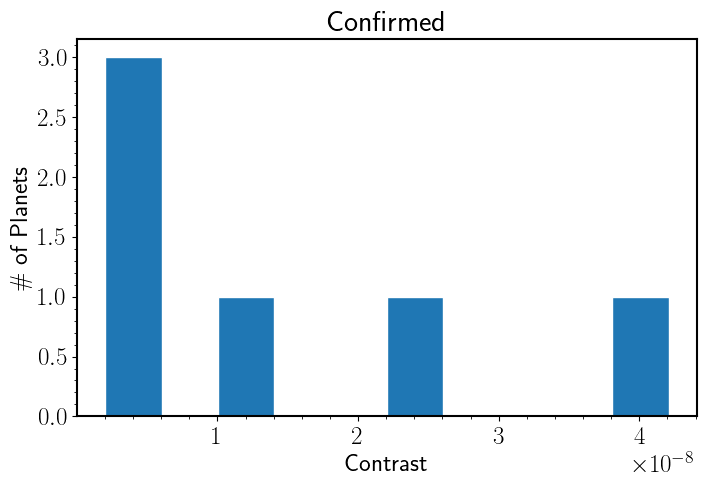

In [149]:
plt.hist(dmag_conf,edgecolor='white')
plt.xlabel('Contrast')
plt.ylabel('\# of Planets')
plt.minorticks_on()
plt.title('Confirmed')

### Contrast for candidate planets

In [150]:
dmag_cand = []

for i in range (0,len(candidates)):
    dmag2 = contrast(.33,.3,rad_cand_au.value[i],candidates['semi_au'].values[i])
    dmag_cand = np.append(dmag_cand,dmag2)
    #print (dmag_conf)

In [151]:
dmag_cand

array([7.26296836e-09, 1.94962061e-09, 7.63954897e-10, 2.82262348e-10,
       1.24801930e-09, 9.32574731e-10, 1.84286040e-09, 1.23092884e-09,
       1.18421531e-09, 2.48854105e-09, 5.99392972e-10, 7.50413236e-10,
       6.82954328e-10, 1.64772231e-09, 1.05702241e-09, 7.37747679e-10,
       1.42675749e-09, 1.19824305e-09, 7.14278528e-10, 8.82790025e-10,
       7.75590141e-10, 5.27468929e-10, 1.62162457e-09, 1.86569558e-09,
       8.36526300e-10, 1.16975350e-09, 9.40427001e-10, 1.08335378e-09,
       4.04283708e-10, 2.40760200e-09, 1.03411525e-09, 2.63460161e-07,
       1.98496109e-08, 1.69211643e-07, 7.86621439e-10])

Text(0.5, 1.0, 'Candidates')

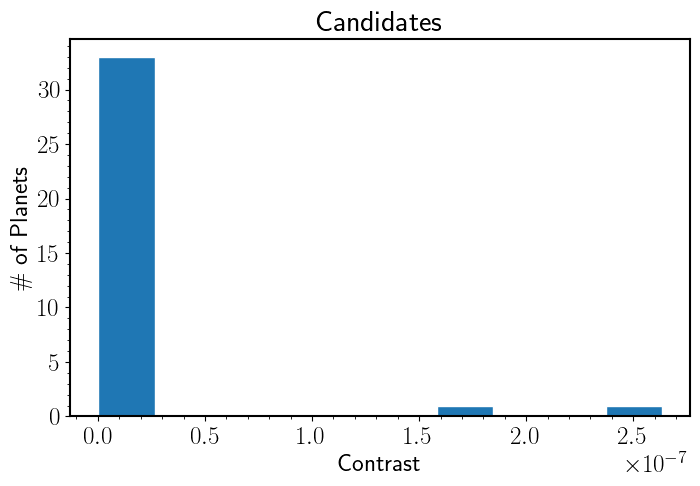

In [152]:
plt.hist(dmag_cand,edgecolor='white')
plt.xlabel('Contrast')
plt.ylabel('\# of Planets')
plt.minorticks_on()
plt.title('Candidates')

In [92]:
len(candidates)

35

Text(0.5, 1.0, 'Confirmed n=6')

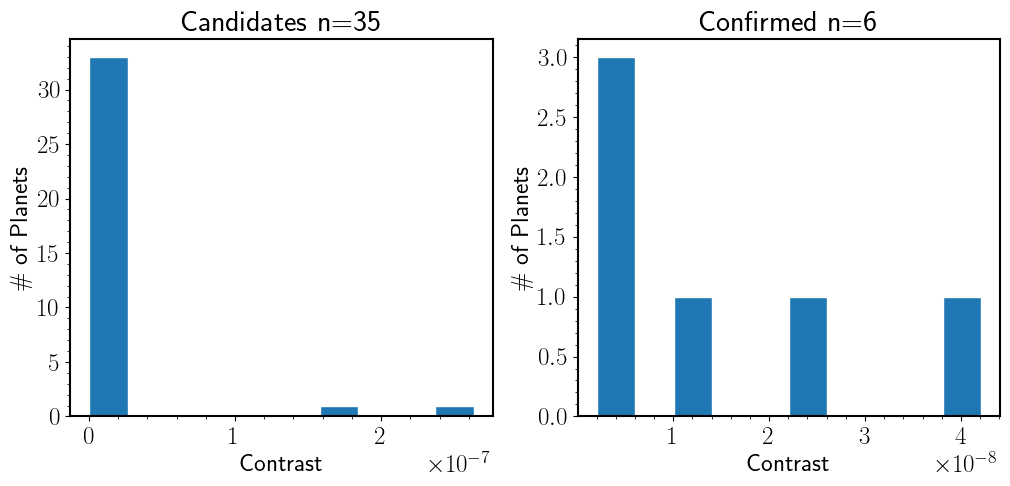

In [153]:
fig,axs = plt.subplots(1,2, figsize=(12,5), facecolor='w', edgecolor='k')

axs[0].hist(dmag_cand,edgecolor='white')
axs[0].set_xlabel('Contrast')
axs[0].set_ylabel('\# of Planets')
axs[0].minorticks_on()
axs[0].set_title('Candidates n=35')

axs[1].hist(dmag_conf,edgecolor='white')
axs[1].set_xlabel('Contrast')
axs[1].set_ylabel('\# of Planets')
axs[1].minorticks_on()
axs[1].set_title('Confirmed n=6')

In [118]:
confirmed

,Unnamed: 0,Unnamed: 0.1,name,hostname,insol,period,T_eff,rade,semi_au,masse_est,eccen,st_log_lum,discoverymethod,H_Tidal,H_Radio,H_Total,TSM
0,0,2,Kepler-1544 b,Kepler-1544,0.774587,168.811174,248.740874,1.722270,0.539467,3.613241,0.00,-0.647,Kepler,0.000000e+00,2.966220e+14,2.966220e+14,2.758663
1,1,4,Kepler-296 f,Kepler-296,0.620000,63.336270,212.794092,1.800000,0.255000,3.894446,0.33,-1.569,Kepler,2.045600e+13,3.386230e+14,3.590790e+14,3.656112
2,2,6,Kepler-62 f,Kepler-62,0.509360,267.291000,223.993704,1.533375,0.722749,2.966459,0.00,-0.575,Kepler,0.000000e+00,2.093360e+14,2.093360e+14,2.505502
3,3,8,Kepler-1652 b,Kepler-1652,0.810000,38.097220,253.928767,1.600000,0.165400,3.188594,0.00,-1.638,Kepler,0.000000e+00,2.378260e+14,2.378260e+14,5.800640
4,4,9,Kepler-441 b,Kepler-441,0.241811,207.248200,185.929645,1.568436,0.558807,3.082536,0.10,-1.122,Kepler,2.515201e+09,2.240270e+14,2.240290e+14,2.613607
5,5,10,Kepler-1229 b,Kepler-1229,0.629999,86.828989,236.218911,1.556471,0.315740,3.042715,0.00,-1.202,Kepler,0.000000e+00,2.189380e+14,2.189380e+14,2.594660


In [155]:
confirmed['Contrast'].values*-1

array([4.58542543e-09, 2.24166998e-08, 2.02501574e-09, 4.20994074e-08,
       3.54418811e-09, 1.09327367e-08])

In [120]:
#confirmed.to_csv('/Users/lupitatovar/Cool-Worlds/targets/confirmed_contrast.csv')

In [123]:
candidates.insert(16,'Contrast',dmag_cand)
candidates

,Unnamed: 0,Unnamed: 0.1,name,hostname,Insolation,Period,T_eff,Radius,masse_est,semi_au,st_log_lum,Discovery,H_Tidal,H_Radio,H_Total,TSM,Contrast
0,0,0,KOI-4427.01,KIC 4172805,0.318849,147.661729,199.239771,1.797673,3.885904,0.447412,-1.195000,Kepler,4.269050e+10,3.373120e+14,3.373540e+14,2.627650,-7.262968e-09
1,1,1,KOI-4848.01,KIC 9005321,0.160519,384.696100,167.826873,1.880000,4.192848,0.903101,-0.883000,Kepler,2.197108e+10,3.858090e+14,3.858310e+14,1.401344,-1.949621e-09
2,2,2,KOI-7716.01,KIC 5097856,0.434274,483.364050,215.238882,1.503482,2.868943,1.153766,-0.238000,Kepler,4.704759e+08,1.973300e+14,1.973310e+14,0.839124,-7.639549e-10
3,3,4,KOI-5087.01,KIC 4770798,0.332875,651.074310,201.395598,1.141911,1.563745,1.441648,-0.160000,Kepler,1.584473e+07,8.645620e+13,8.645620e+13,1.533628,-2.822623e-10
4,4,5,KOI-5227.01,KIC 6034834,0.598982,371.564920,233.256197,1.611944,3.229113,0.967816,-0.251000,Kepler,2.518710e+09,2.431920e+14,2.431940e+14,1.520763,-1.248019e-09
5,5,6,KOI-5236.01,KIC 6067545,0.811569,550.865140,251.658130,1.921435,4.350944,1.334558,0.160000,Kepler,6.994064e+08,4.118850e+14,4.118860e+14,1.883685,-9.325747e-10
6,6,7,KOI-5130.01,KIC 5166811,0.430720,370.059180,214.797110,1.900000,4.268858,0.938774,-0.420683,Kepler,1.127595e+09,3.982540e+14,3.982550e+14,1.134144,-1.842860e-09
7,7,8,KOI-5408.01,KIC 7631138,0.354582,415.748785,204.601495,1.710821,3.572556,1.034289,-0.421000,Kepler,3.826753e+08,2.907450e+14,2.907460e+14,1.659374,-1.230929e-09
8,8,9,KOI-5789.01,KIC 10387792,0.319386,383.262170,199.323573,1.532865,2.964783,0.944805,-0.545000,Kepler,5.560228e+08,2.091270e+14,2.091280e+14,1.655275,-1.184215e-09
9,9,10,KOI-5798.01,KIC 10487228,0.403587,318.258580,211.331357,1.963136,4.512475,0.834702,-0.551000,Kepler,2.157382e+09,4.392890e+14,4.392910e+14,1.181350,-2.488541e-09


In [124]:
#candidates.to_csv('/Users/lupitatovar/Cool-Worlds/targets/confirmed_contrast.csv')

In [125]:
stars

,hostname,st_mass,st_radius,st_teff,st_log_lum,st_distance,type,Jmag,Kmag,activity_index,Status,Discovery
0,Kepler-1544,0.735000,0.716000,4696.9,-0.647000,334.800000,K4V,12.480,11.903,NaN,Confirmed,Kepler
1,Kepler-296,0.500000,0.480000,3740.0,-1.569000,167.000000,M2V,13.391,12.600,NaN,Confirmed,Kepler
2,Kepler-62,0.705000,0.696000,4966.5,-0.575000,300.000000,G5V,12.256,11.659,NaN,Confirmed,Kepler
3,Kepler-1652,0.400000,0.380000,3638.0,-1.638000,252.000000,M2V,13.454,12.635,NaN,Confirmed,Kepler
4,Kepler-441,0.542000,0.526000,4146.9,-1.122000,259.400000,K7V,13.040,12.288,NaN,Confirmed,Kepler
5,Kepler-1229,0.557000,0.567000,3834.5,-1.202000,263.600000,M0V,13.228,12.374,NaN,Confirmed,Kepler
6,KIC 4172805,0.548000,0.554000,3895.2,-1.195000,272.400000,M1V,13.339,12.499,NaN,Candidate,Kepler
7,KIC 9005321,0.664000,0.658000,4278.0,-0.883000,472.000000,K6V,13.711,12.997,NaN,Candidate,Kepler
8,KIC 5097856,0.877000,0.850000,5450.6,-0.238000,768.700000,G8V,13.621,13.161,NaN,Candidate,Kepler
9,KIC 4770798,0.943000,0.929000,5456.7,-0.160000,302.900000,G8V,11.307,10.918,NaN,Candidate,Kepler


## Now calculating the position of the targets on the sky
This will help test to see if they fall within the IWA

$\theta$ = separation (semi-major axis)/distance to star

IWA = 2lambda (wavelength to observe) / Diameter of mirror 

IWA will cut off the longest wavelengths for planets around more distant stars

In [126]:
def theta(a,d):
    angle = a/d
    return angle

In [134]:
conf_semi = confirmed['semi_au'].values
cand_semi = candidates['semi_au'].values

cand_dist = cand['st_distance'].values
conf_dist = conf['st_distance'].values

print (conf_semi[5],conf_dist[5])
print (cand_semi[31],cand_dist[31])

0.315740279 263.6
0.050951751 46.284363


In [160]:
theta_cand = []

for i in range (0,len(candidates)):
    a = theta(cand_semi[i],cand_dist[i])
    theta_cand = np.append(theta_cand,a)

In [165]:
theta_cand

array([0.00164248, 0.00191335, 0.00150093, 0.00475949, 0.00190403,
       0.00257091, 0.00102161, 0.00237331, 0.00247396, 0.00107648,
       0.00397711, 0.00230455, 0.00475753, 0.00331035, 0.00148817,
       0.00152627, 0.00269498, 0.00313744, 0.00221755, 0.00187491,
       0.00251271, 0.00247966,        nan, 0.00227611, 0.00288258,
       0.00183498, 0.00062815, 0.0018238 , 0.00464624, 0.00139363,
       0.00114113, 0.00110084, 0.00164261, 0.00193907, 0.05626582])

In [162]:
theta_conf = []

for i in range (0,len(confirmed)):
    a = theta(conf_semi[i],conf_dist[i])
    theta_conf = np.append(theta_conf,a)
    
theta_conf

array([0.00161131, 0.00152695, 0.00240916, 0.00065635, 0.00215423,
       0.0011978 ])

Ideal case for IWA

.7-8 micorns = IR
.2-.4 micorns = UV



In [158]:
def iwa(l,D):
    IWA = 2*l/D
    return IWA

In [163]:
print(iwa(.4,15))
print(iwa(2,15))

0.05333333333333334
0.26666666666666666


Takeaway: ALL the targets are within the IWA

with the exception of maybe TOI-4328.01 if we assume 15m mirror and 2lambda/D